In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('insurance.csv')
df.head()
df.dtypes
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [4]:
num_features = [0, 2, 3]
num_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

In [5]:
cat_features = [1, 4, 5]
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

In [7]:
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm.SVR())
])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  [0, 2, 3]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [1, 4, 5])])),
                ('classifier', SVR())])

In [10]:
pred = clf.predict(X_test)

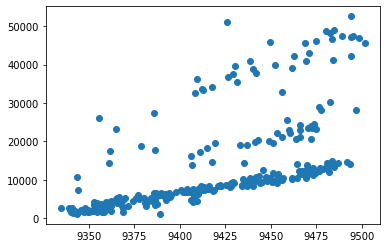

In [11]:
plt.scatter(pred, y_test)
#plt.xscale('log')
#plt.yscale('log')
plt.show()